In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate clusters

In [24]:
x_dim = 2; num_clusters = 2; samples = 10**4

In [25]:
mu_1 = np.array([[10],[0]])
mu_2 = np.array([[0],[10]])

In [26]:
cluster_1 = mu_1 + np.random.randn(x_dim,samples)
cluster_2 = mu_2 + np.random.randn(x_dim,samples)

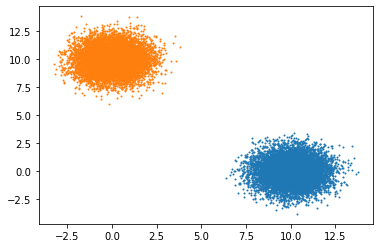

In [27]:
plt.scatter(cluster_1[0],cluster_1[1],s=1)
plt.scatter(cluster_2[0],cluster_2[1],s=1)
plt.show()

In [28]:
X = np.concatenate((cluster_1,cluster_2), axis=1) # concatenate clusters

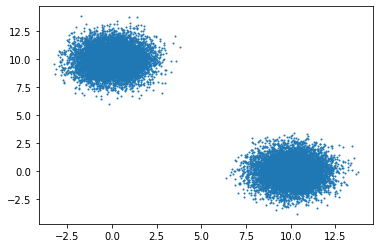

In [29]:
plt.scatter(X[0],X[1],s=1)
plt.show()

### Online algorithm

In [30]:
W = np.random.randn(num_clusters,x_dim)
theta = np.zeros((num_clusters,1))
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,2*samples))

idx = np.random.permutation(2*samples)

for t in range(2*samples):

    x = X[:,idx[t]].reshape((2,1))

    a = -W@x + theta

    c = np.argmin(a)
    y = np.zeros((num_clusters,1)); y[c] = 1
    z = -a[c]

    n += y

    for i in range(num_clusters):
        for j in range(x_dim):
            W[i,j] += y[i]*(2*x[j] - W[i,j])/100

        theta[i] += y[i]*(z - theta[i])/100

    for j in range(x_dim):
        Y[j,idx[t]] = y[j]

print(f'Cluster 1 mean: {W[0,:]/2}')
print(f'Cluster 2 mean: {W[1,:]/2}')

Cluster 1 mean: [ 0.08982992 10.05371218]
Cluster 2 mean: [9.94644515 0.09830819]
